# Lab3: Graph-Search - A* Algorithm

### Mazen Elgabalawy-u1999109
### Solomon Chibuzo Nwafor-u1999124

In [7]:
# Import necessary libraries

import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import heapq #library used to create priority queue
import copy
import csv
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

Create functions required for A* algorithm

In [8]:
# calculate euclidean distance between two nodes
def euclidean_distance(q1,q2):
    distance = np.sqrt((q1[0]-q2[0])**2 + (q1[1]-q2[1])**2)
    return distance

# check if list contains a certain node
def contains_cell(lst,node):
    for _, cell_value in lst:
        if cell_value == node:
            return True
    return False

# Reconstruct Path from start to goal
def reconstruct_path(parent, current):
    path = [current]
    while current in parent.keys():
        current = parent[current]
        path = [current] + path
    return path[1:]

### Part1: A* for graph search

Create a function to load vertex data from environment and visibility

In [9]:
def load_data(env,visibility):
    # Load point data
    data = []
    with open(env, "r") as csvfile:
        reader = csv.reader(csvfile)
        next(reader) # Skip header row
        for row in reader:
            polygon_id = int(row[0])
            x, y = float(row[1]), float(row[2])
            data.append((polygon_id, x, y))

    # Load edges data
    edges = []
    with open(visibility, "r") as csvfile:
        reader = csv.reader(csvfile)
        next(reader) # Skip header row
        for row in reader:
            start_vertex = int(row[0])
            end_vertex = int(row[1])
            edges.append((start_vertex, end_vertex))

    return data, edges

A* algorithm for graph search

In [10]:
def a_star_graph(points,neighbors):

    open_set = [] #create priority queue

    vertecies = [] #get index of each vertex
    for i in range(len(points)):
        vertecies.append(i)
    
    #set start and goal nodes
    start = vertecies[0]
    goal = vertecies[-1]

    # create dict to keep track of parent of each node
    parent = {}
    parent[start] = None

    # initialize gScore of all nodes
    gScore = np.full(len(points),np.inf)
    gScore[start] = 0.0

    # initialize fScore of all nodes
    fScore = np.full(len(points),np.inf)
    fScore[start] = gScore[start] + euclidean_distance(points[0],points[-1])

    heapq.heappush(open_set,(fScore[start],start)) # add start node to priority queue
    
    # traverse nodes according to priority until goal is reached
    while open_set:
        _ , current = heapq.heappop(open_set) #node with least fScore

        if current == goal:
            path = reconstruct_path(parent,current)
            cost = gScore[path[-1]]
            return path, cost
        
        # check neighbors of current node and update their cost if necessary
        for n in neighbors[current]:
            tentative_gscore = gScore[current] + euclidean_distance(points[n],points[current])
            if tentative_gscore < gScore[n]:
                parent[n] = current
                gScore[n] = tentative_gscore
                fScore[n] = tentative_gscore + euclidean_distance(points[n],points[goal])
                if not contains_cell(open_set,n):
                    heapq.heappush(open_set,(fScore[n],n))

Define list containing all environments and visibility graphs

In [11]:
graphs = [["env_0.csv","visibility_graph_env_0.csv"],
          ["env_1.csv","visibility_graph_env_1.csv"],
          ["env_2.csv","visibility_graph_env_2.csv"],
          ["env_mx.csv","visibility_graph_env_mx.csv"]]

Plot Graphs and apply A* on all environements

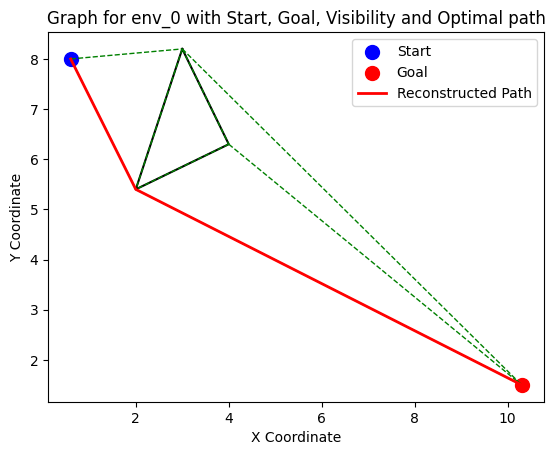

Path Nodes:  [0, 3, 4]
Path Coordinates:  [(0.6, 8.0), (2.0, 5.4), (10.3, 1.5)]
Path Cost:  12.12356982653498


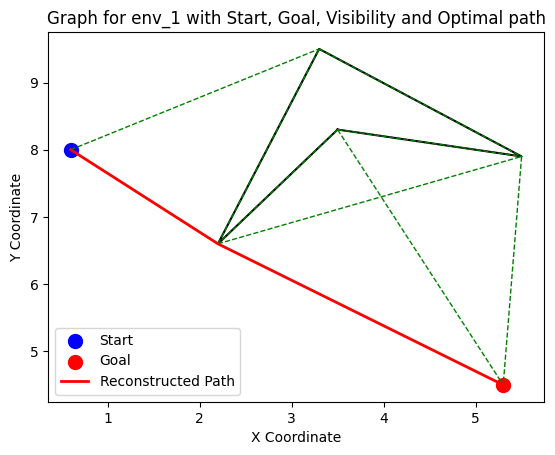

Path Nodes:  [0, 2, 5]
Path Coordinates:  [(0.6, 8.0), (2.2, 6.6), (5.3, 4.5)]
Path Cost:  5.870358207916741


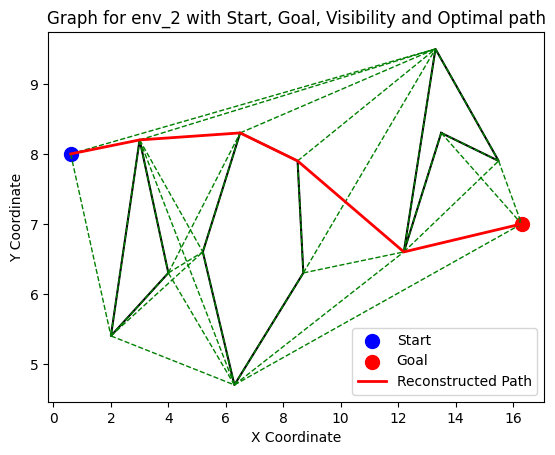

Path Nodes:  [0, 1, 4, 8, 10, 13]
Path Coordinates:  [(0.6, 8.0), (3.0, 8.2), (6.5, 8.3), (8.5, 7.9), (12.2, 6.6), (16.3, 7.0)]
Path Cost:  15.990555296232605


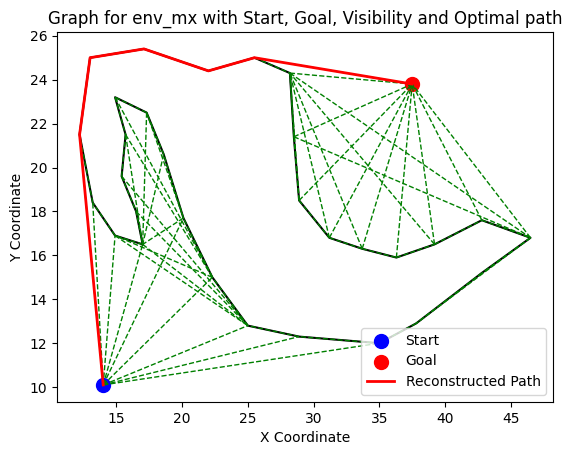

Path Nodes:  [0, 4, 5, 6, 7, 8, 31]
Path Coordinates:  [(14.0, 10.1), (12.2, 21.5), (13.0, 25.0), (17.1, 25.4), (22.0, 24.4), (25.5, 25.0), (37.5, 23.8)]
Path Cost:  39.86286786229326


In [12]:
for graph in graphs:
    data , edges = load_data(graph[0],graph[1])
    # Separate start, obstacles, and goal
    start = data[0][1:]
    goal = data[-1][1:]
    obstacles = {}

    for d in data[1:-1]:  # Exclude start and goal points
        poly_id, x, y = d
        if poly_id not in obstacles:
            obstacles[poly_id] = []
        obstacles[poly_id].append((x, y))

    # Create obstacle polygons and plot them
    obstacle_polygons = []

    # Draw each obstacle as a closed polygon
    for points in obstacles.values():
        # Create and store each obstacle polygon
        polygon = Polygon(points)
        obstacle_polygons.append(polygon)
        
        # Plot the polygon by connecting its vertices
        x, y = zip(*points)
        plt.plot(x + (x[0],), y + (y[0],), color="black")  # Closing the polygon

    # arrange all points
    all_points = [start] + [pt for pts in obstacles.values() for pt in pts] + [goal]
    
    # Define neighbors of each node
    neighbors = {}
    for v,n in edges:
        if v not in neighbors:
            neighbors[v] = []
        neighbors[v].append(n)

    path, cost = a_star_graph(all_points,neighbors)
    path_points = [all_points[i] for i in path]

    # Start and Goal points
    plt.scatter(*start, color="blue", label="Start", s=100)
    plt.scatter(*goal, color="red", label="Goal", s=100)

    # Plot visibility 
    for edge in edges:
        start_vertex, end_vertex = edge
        p1, p2 = all_points[start_vertex], all_points[end_vertex]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g--', linewidth=1.0)

    # Plot path
    x,y = zip(*path_points)
    plt.plot(x, y, color='r',label="Reconstructed Path", linewidth=2)

    # Display the plot
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.title("Graph for " + str(graph[0].replace(".csv","")) + " with Start, Goal, Visibility and Optimal path")
    plt.show()

    # print path verticies and (x,y) coordinates along with cost of path
    print("Path Nodes: ",path)
    print("Path Coordinates: ", path_points)
    print("Path Cost: ", cost)

### Part2: A* for gridmaps

Define Connectivity types

In [13]:
connectivity_4 = [(0,-1),(-1,0),(1,0),(0,1)]
connectivity_8 = [(-1,-1),(0,-1),(1,-1),(-1,0),(1,0),(-1,1),(0,1),(1,1)]

Create a variation of A* that works for gridmaps

In [31]:
def a_star_grid(grid_map,q_start,q_goal,connectivity):
    open_set = []
    close_set = []

    parent = {} # dictionary to contain parent of each explored cell
    parent[q_start] = None

    gScore = copy.deepcopy(grid_map).astype(float)
    gScore.fill(np.inf) #initialize g-cost of all cesll as infinity
    gScore[q_start] = 0.0 # set g-cost at start as zero

    fScore = copy.deepcopy(grid_map).astype(float)
    fScore.fill(np.inf)
    fScore[q_start] = gScore[q_start] + euclidean_distance(q_start,q_goal)

    heapq.heappush(open_set,(fScore[q_start],q_start))

    while open_set:
        # choose cell with lowest fScore
        _, current = heapq.heappop(open_set)
        # add current cell to closed list
        close_set.append(current)

        # if goal is reached, return path
        if current == q_goal:
            path = reconstruct_path(parent,current)
            cost = gScore[path[-1]]
            return path, cost, close_set
        
        # Check neighbours of current cell and update score if necessary
        for i,j in connectivity:
            nx,ny = current[0] + i , current[1] +j
            if nx in range(np.shape(grid_map)[0]) and ny in range(np.shape(grid_map)[1]) and grid_map[nx,ny] == 0:
                tentative_gScore = gScore[current] + euclidean_distance(current,(nx,ny))
                if tentative_gScore < gScore[(nx,ny)]:
                    parent[(nx,ny)] = current
                    gScore[(nx,ny)] = tentative_gScore
                    fScore[(nx,ny)] = gScore[(nx,ny)] + euclidean_distance(q_goal,(nx,ny))
                    if not contains_cell(open_set,(nx,ny)):
                        heapq.heappush(open_set,(fScore[(nx,ny)],(nx,ny)))

    pass

### Testing Gridmap

Test A* on gridmap using both types of connectivity

In [32]:
# Create dict contating all maps start and goal points
maps = {"map0.png":[(10,10),(90,70)],
        "map1.png":[(60,60),(90,60)],
        "map2.png":[(8,31),(139,38)],
        "map3.png":[(50,90),(375,375)]}

In [67]:
def test_gridmaps(maps):
    for map in maps:
        
        # Load grid map
        image = Image.open(map).convert('L')
        grid_map = np.array(image.getdata()).reshape(image.size[0], image.size[1])/255
        # binarize the image
        grid_map[grid_map > 0.5] = 1
        grid_map[grid_map <= 0.5] = 0
        # Invert colors to make 0 -> free and 1 -> occupied
        grid_map = (grid_map * -1) + 1
        
        # Get start and goal for each map
        start = maps[map][0]
        goal = maps[map][1]

        # Use A* to calculate path and path cost for both connectivity 4 and 8
        path4 , cost4, explored4= a_star_grid(grid_map,start,goal,connectivity_4)
        path8 , cost8, explored8 = a_star_grid(grid_map,start,goal,connectivity_8)
        y4,x4 = zip(*path4)
        y8,x8 = zip(*path8)

        # Extract explored nodes
        y_explored_4 , x_explored_4 = zip(*explored4)
        y_explored_8 , x_explored_8 = zip(*explored8)

        # plot results
        plt.matshow(grid_map)
        # Plot explored cells
        # plt.scatter(x_explored_4,y_explored_4,color='k',label='Explored Cells')
        # plt.scatter(x_explored_8,y_explored_8,color='k',label='Explored Cells')
        # Plot Start and Goal points
        plt.scatter(start[1],start[0],color='blue',label = "Start",s=60)
        plt.scatter(goal[1],goal[0],color='red',label = "Goal", s=60)

        # Plot Path for both connectivities
        plt.plot(x4, y4, color='cyan', marker='o', linestyle='-',label="Connectivity4",markersize=1)
        plt.plot(x8, y8, color='green', marker='o', linestyle='-',label="Connectivity8",markersize=1)
        plt.title(map.replace(".png",""))
        plt.legend()
        plt.show()

        #Print Path and its cost
        print("Path Cost for connectivity4: ", cost4)
        print("Connectivity4 path:", path4)
        print("Path Cost for connectivity8: ", cost8)
        print("Connectivity8 path:", path8)

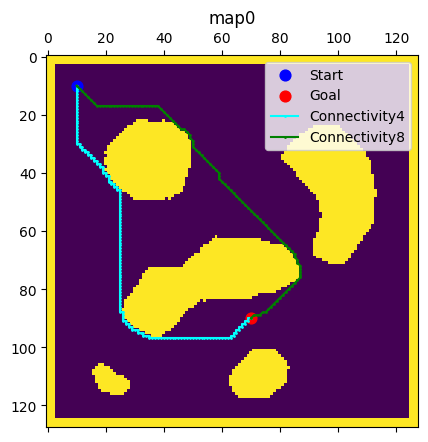

Path Cost for connectivity4:  154.0
Connectivity4 path: [(10, 10), (11, 10), (12, 10), (13, 10), (14, 10), (15, 10), (16, 10), (17, 10), (18, 10), (19, 10), (20, 10), (21, 10), (22, 10), (23, 10), (24, 10), (25, 10), (26, 10), (27, 10), (28, 10), (29, 10), (30, 10), (30, 11), (31, 11), (31, 12), (32, 12), (32, 13), (33, 13), (33, 14), (34, 14), (34, 15), (35, 15), (35, 16), (36, 16), (36, 17), (37, 17), (37, 18), (38, 18), (38, 19), (39, 19), (40, 19), (40, 20), (41, 20), (41, 21), (42, 21), (43, 21), (43, 22), (44, 22), (44, 23), (45, 23), (45, 24), (46, 24), (46, 25), (47, 25), (48, 25), (49, 25), (50, 25), (51, 25), (52, 25), (53, 25), (54, 25), (55, 25), (56, 25), (57, 25), (58, 25), (59, 25), (60, 25), (61, 25), (62, 25), (63, 25), (64, 25), (65, 25), (66, 25), (67, 25), (68, 25), (69, 25), (70, 25), (71, 25), (72, 25), (73, 25), (74, 25), (75, 25), (76, 25), (77, 25), (78, 25), (79, 25), (80, 25), (81, 25), (82, 25), (83, 25), (84, 25), (85, 25), (86, 25), (87, 25), (88, 25), (88

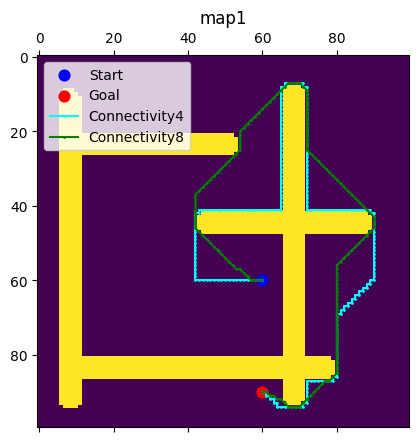

Path Cost for connectivity4:  240.0
Connectivity4 path: [(60, 60), (60, 59), (60, 58), (60, 57), (60, 56), (60, 55), (60, 54), (60, 53), (60, 52), (60, 51), (60, 50), (60, 49), (60, 48), (60, 47), (60, 46), (60, 45), (60, 44), (60, 43), (60, 42), (59, 42), (58, 42), (57, 42), (56, 42), (55, 42), (54, 42), (53, 42), (52, 42), (51, 42), (50, 42), (49, 42), (48, 42), (47, 42), (46, 42), (45, 42), (44, 42), (43, 42), (42, 42), (42, 43), (41, 43), (41, 44), (41, 45), (41, 46), (41, 47), (41, 48), (41, 49), (41, 50), (41, 51), (41, 52), (41, 53), (41, 54), (41, 55), (41, 56), (41, 57), (41, 58), (41, 59), (41, 60), (41, 61), (41, 62), (41, 63), (41, 64), (41, 65), (40, 65), (39, 65), (38, 65), (37, 65), (36, 65), (35, 65), (34, 65), (33, 65), (32, 65), (31, 65), (30, 65), (29, 65), (28, 65), (27, 65), (26, 65), (25, 65), (24, 65), (23, 65), (22, 65), (21, 65), (20, 65), (19, 65), (18, 65), (17, 65), (16, 65), (15, 65), (14, 65), (13, 65), (12, 65), (11, 65), (10, 65), (9, 65), (8, 65), (8, 6

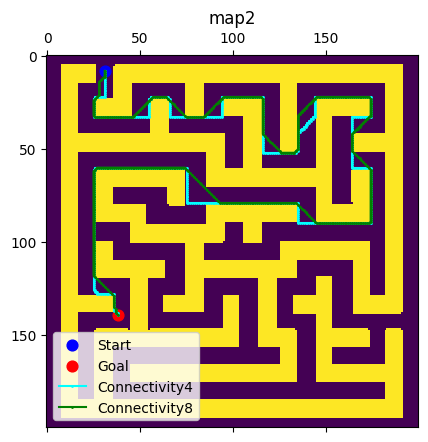

Path Cost for connectivity4:  632.0
Connectivity4 path: [(8, 31), (9, 31), (10, 31), (11, 31), (12, 31), (13, 31), (14, 31), (15, 31), (16, 31), (17, 31), (18, 31), (19, 31), (20, 31), (21, 31), (22, 31), (22, 30), (22, 29), (22, 28), (22, 27), (22, 26), (23, 26), (23, 25), (24, 25), (25, 25), (26, 25), (27, 25), (28, 25), (29, 25), (30, 25), (31, 25), (32, 25), (33, 25), (33, 26), (33, 27), (33, 28), (33, 29), (33, 30), (33, 31), (33, 32), (33, 33), (33, 34), (33, 35), (33, 36), (33, 37), (33, 38), (33, 39), (33, 40), (33, 41), (33, 42), (33, 43), (33, 44), (33, 45), (33, 46), (33, 47), (33, 48), (33, 49), (33, 50), (33, 51), (33, 52), (33, 53), (33, 54), (33, 55), (32, 55), (31, 55), (30, 55), (29, 55), (28, 55), (27, 55), (26, 55), (25, 55), (24, 55), (23, 55), (23, 56), (22, 56), (22, 57), (22, 58), (22, 59), (22, 60), (22, 61), (22, 62), (22, 63), (22, 64), (22, 65), (23, 65), (23, 66), (24, 66), (25, 66), (26, 66), (27, 66), (28, 66), (29, 66), (30, 66), (31, 66), (32, 66), (33, 

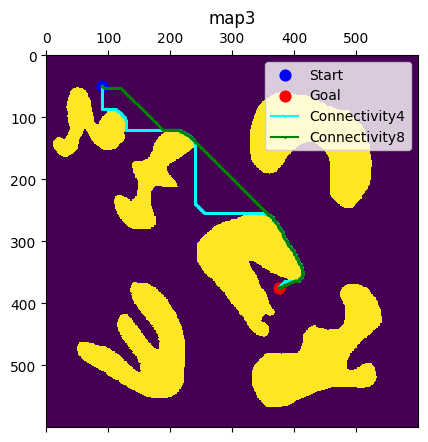

Path Cost for connectivity4:  688.0
Connectivity4 path: [(50, 90), (51, 90), (52, 90), (53, 90), (54, 90), (55, 90), (56, 90), (57, 90), (58, 90), (59, 90), (60, 90), (61, 90), (62, 90), (63, 90), (64, 90), (65, 90), (66, 90), (67, 90), (68, 90), (69, 90), (70, 90), (71, 90), (72, 90), (73, 90), (74, 90), (75, 90), (76, 90), (77, 90), (78, 90), (79, 90), (80, 90), (81, 90), (82, 90), (83, 90), (84, 90), (85, 90), (86, 90), (87, 90), (87, 91), (87, 92), (87, 93), (87, 94), (87, 95), (87, 96), (87, 97), (87, 98), (87, 99), (87, 100), (87, 101), (87, 102), (87, 103), (87, 104), (87, 105), (87, 106), (87, 107), (87, 108), (87, 109), (87, 110), (87, 111), (87, 112), (88, 112), (88, 113), (88, 114), (89, 114), (89, 115), (90, 115), (90, 116), (91, 116), (91, 117), (92, 117), (92, 118), (93, 118), (93, 119), (93, 120), (94, 120), (94, 121), (95, 121), (95, 122), (96, 122), (97, 122), (97, 123), (98, 123), (98, 124), (99, 124), (99, 125), (100, 125), (100, 126), (101, 126), (102, 126), (102, 1

In [68]:
test_gridmaps(maps)